theta_max, diff_max, max_ll = 36.5310621242485 27.687374749498996 -30.47136155150647
theta_max, diff_max, max_ll = 36.39879759519038 27.583166332665332 -30.485038561335173
theta_max, diff_max, max_ll = 36.28657314629258 27.494989979959918 -30.51090020934145
theta_max, diff_max, max_ll = 36.22244488977956 27.442885771543086 -30.54889956820285
theta_max, diff_max, max_ll = 36.098196392785574 27.34669338677355 -30.55956379435871
theta_max, diff_max, max_ll = 36.02204408817635 27.286573146292586 -30.489113669027883


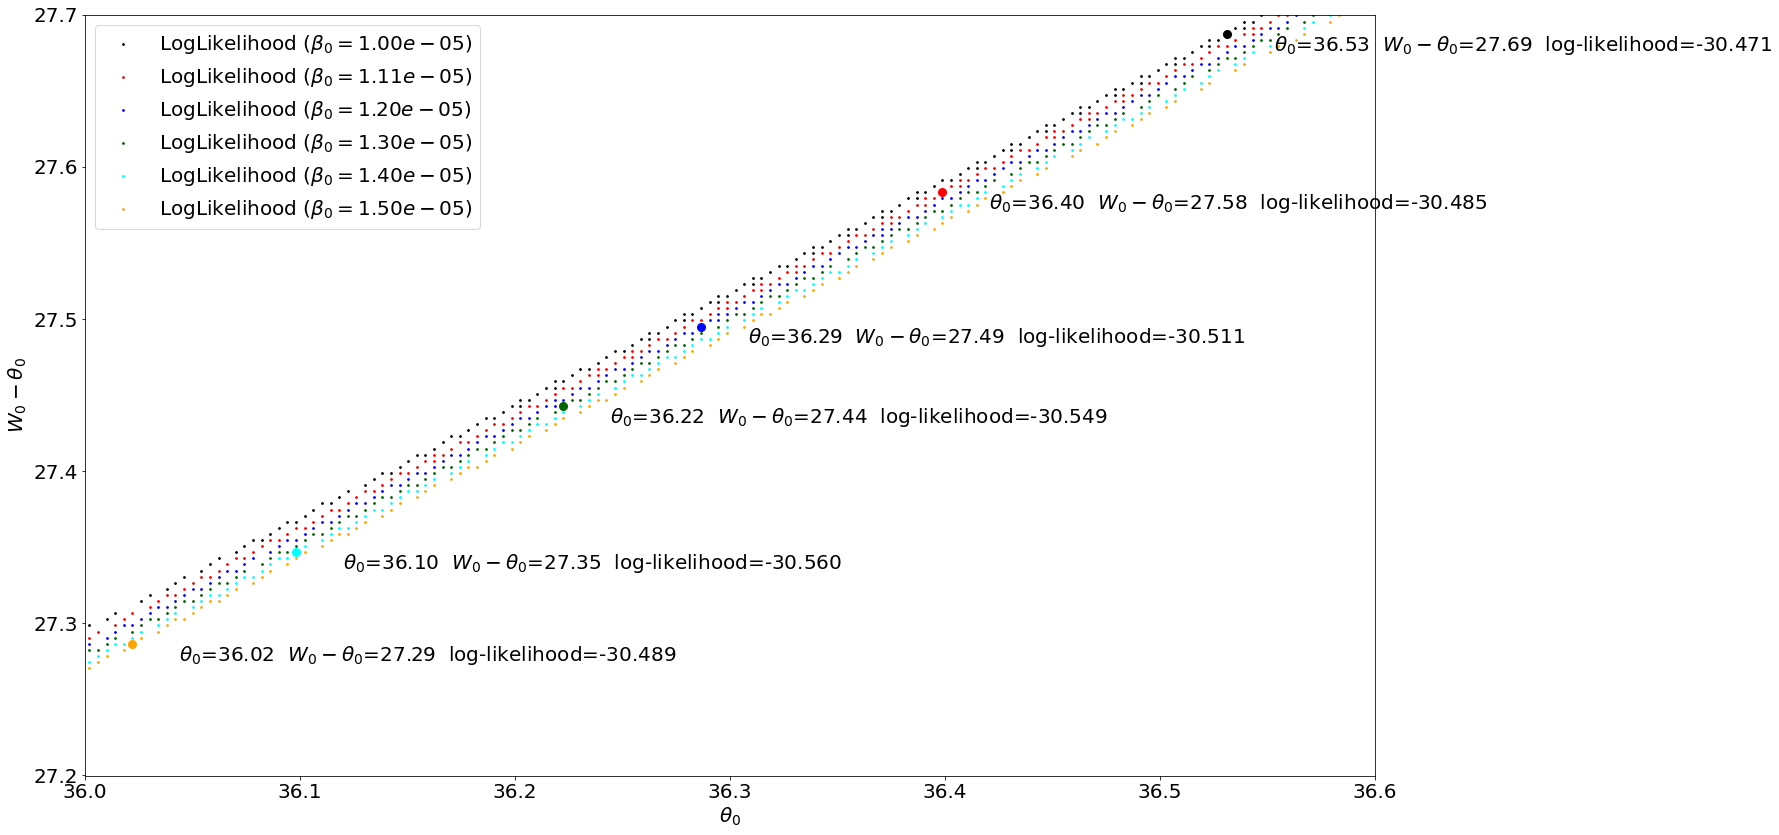

In [2]:
"""Plot likelihood."""

import matplotlib.pyplot as plt
import numpy as np


def plot_fun(dir, name, beta_array):
    """Plotting function."""
    table = np.zeros((len(beta_array), 3))
    color_arr = ['black', 'red', 'blue', 'DarkGreen', 'cyan', 'orange']
    # beta_array = [1.0e-5]

    fig = plt.figure(figsize=(25, 12))
    plt.rc('font', size=20)

    i = 0
    for beta0 in beta_array:
        data = np.loadtxt('{}/{}{:.2e}.txt'.format(dir, name, beta0))
        theta = data[:,0]
        diff = data[:,1]
        loglike = data[:,3]

        # Find maxima of the log likelihood
        max_ll = np.amax(loglike)
        i_max = np.where(loglike == max_ll)[0][0]
        theta_max = theta[i_max]
        diff_max = diff[i_max]
        table[i, 0:3] = [theta_max, diff_max, max_ll]
        print('theta_max, diff_max, max_ll =', theta_max, diff_max, max_ll)

        bool_ll = (loglike > -50)
        theta = theta[bool_ll]
        diff = diff[bool_ll]
        log_like = loglike[bool_ll]

        # Plot
        plt.scatter(theta, diff, s=3, marker='o', color = color_arr[i], vmax=5.e1, label=r'LogLikelihood ($\beta_0={:.2e}$)'.format(beta0))
        plt.plot(theta_max, diff_max, marker='o', markersize = 8, color = color_arr[i])
        plt.annotate(r'$\theta_0$={:.2f}  $W_0-\theta_0$={:.2f}  log-likelihood={:.3f}'.format(theta_max, diff_max, max_ll), xy = (theta_max, diff_max), xytext =(theta_max*1.0006, diff_max*0.9996))
        plt.xlim(36.0, 36.6)
        plt.ylim(27.2, 27.7)
        plt.xlabel(r'$\theta_0$')
        plt.ylabel(r'$W_0-\theta_0$')
        plt.legend(loc=2)
        
    
        # fig.savefig("loglikelihood.png")
        i += 1
    plt.tight_layout()
    plt.savefig('likelihood_crests.png')

if __name__ == "__main__":
    dir = 'serafin'
    name = 'likelihood_beta0_'
    beta_array = np.linspace(1.0e-5, 1.5e-5, 6)
    beta_array[1] = 1.11e-05
    plot_fun(dir, name, beta_array)